In [33]:
#after running a query for all easements
#acquired after the year 1800 (just to get
#all of them)
#I exported the file to CSV

import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42


% matplotlib inline

In [2]:
df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/conservation/datasets/NCED_data/nced_cons_eas_1800_plus.csv')

In [3]:
df.head()

,Site Name,Easement Holder Name,State,Access,Easement Purpose,Easement Holder Type,Year Established
0,"Wetlands Reserve Program - WRP_Pulaski, AR (05...",U.S. Natural Resources Conservation Service,AR,XA,ENV,FED,2003
1,"Grasslands Reserve Program - GRP_Polk, MO (29167)",U.S. Natural Resources Conservation Service,MO,XA,ENV,FED,2007
2,Farm and Ranch Lands Protection Program - FRPP...,Unknown Easement Holder,WV,XA,FARM,UNK,2009
3,Farm and Ranch Lands Protection Program - FRPP...,Unknown Easement Holder,TX,XA,FARM,JNT,2012
4,"Wetlands Reserve Program - WRP_Worcester, MD (...",State of Maryland,MD,XA,ENV,STAT,2000


In [4]:
df.sort_values('Year Established')

,Site Name,Easement Holder Name,State,Access,Easement Purpose,Easement Holder Type,Year Established
6060,Blue Hills Reservation,Town of Milton,Massachusetts,OA,REC,LOC,1876
2376,Blue Hills Reservation,Town of Milton,Massachusetts,OA,REC,LOC,1895
92,National Park Service Easement,U.S. National Park Service,NE,XA,ENV,FED,1919
98,Cape Romain National Wildlife Refuge,U.S. Fish and Wildlife Service,SC,RA,ENV,FED,1930
101,Delta National Wildlife Refuge,U.S. Fish and Wildlife Service,LA,RA,ENV,FED,1935
93,National Park Service Easement,U.S. National Park Service,VA,XA,ENV,FED,1935
97,Bombay Hook National Wildlife Refuge,U.S. Fish and Wildlife Service,DE,RA,ENV,FED,1937
5960,Barnstable Fire Tower,Massachusetts Division of State Parks and Recr...,Massachusetts,XA,ENV,STAT,1947
2298,Barnstable Fire Tower,Massachusetts Division of State Parks and Recr...,Massachusetts,XA,ENV,STAT,1947
3793,U.S. National Park Service Easement,U.S. National Park Service,VA,UK,REC,FED,1951


In [5]:
df.dtypes

Site Name               object
Easement Holder Name    object
State                   object
Access                  object
Easement Purpose        object
Easement Holder Type    object
Year Established         int64
dtype: object

In [6]:
#let's make a new datetime column
#so we can explore the data that way
df['date'] = pd.to_datetime(df['Year Established'], format="%Y")
df.head()

,Site Name,Easement Holder Name,State,Access,Easement Purpose,Easement Holder Type,Year Established,date
0,"Wetlands Reserve Program - WRP_Pulaski, AR (05...",U.S. Natural Resources Conservation Service,AR,XA,ENV,FED,2003,2003-01-01
1,"Grasslands Reserve Program - GRP_Polk, MO (29167)",U.S. Natural Resources Conservation Service,MO,XA,ENV,FED,2007,2007-01-01
2,Farm and Ranch Lands Protection Program - FRPP...,Unknown Easement Holder,WV,XA,FARM,UNK,2009,2009-01-01
3,Farm and Ranch Lands Protection Program - FRPP...,Unknown Easement Holder,TX,XA,FARM,JNT,2012,2012-01-01
4,"Wetlands Reserve Program - WRP_Worcester, MD (...",State of Maryland,MD,XA,ENV,STAT,2000,2000-01-01


In [7]:
#check to see if it worked
df.dtypes

Site Name                       object
Easement Holder Name            object
State                           object
Access                          object
Easement Purpose                object
Easement Holder Type            object
Year Established                 int64
date                    datetime64[ns]
dtype: object

In [8]:
#now let's set the index to datetime so we can
#work with it
df.set_index('date', inplace=True)
df.head()


,Site Name,Easement Holder Name,State,Access,Easement Purpose,Easement Holder Type,Year Established
date,,,,,,,
2003-01-01,"Wetlands Reserve Program - WRP_Pulaski, AR (05...",U.S. Natural Resources Conservation Service,AR,XA,ENV,FED,2003
2007-01-01,"Grasslands Reserve Program - GRP_Polk, MO (29167)",U.S. Natural Resources Conservation Service,MO,XA,ENV,FED,2007
2009-01-01,Farm and Ranch Lands Protection Program - FRPP...,Unknown Easement Holder,WV,XA,FARM,UNK,2009
2012-01-01,Farm and Ranch Lands Protection Program - FRPP...,Unknown Easement Holder,TX,XA,FARM,JNT,2012
2000-01-01,"Wetlands Reserve Program - WRP_Worcester, MD (...",State of Maryland,MD,XA,ENV,STAT,2000


In [9]:
#remember, we can select all the years from
#1970 or whatever onward
df['1970':]

,Site Name,Easement Holder Name,State,Access,Easement Purpose,Easement Holder Type,Year Established
date,,,,,,,
2003-01-01,"Wetlands Reserve Program - WRP_Pulaski, AR (05...",U.S. Natural Resources Conservation Service,AR,XA,ENV,FED,2003
2007-01-01,"Grasslands Reserve Program - GRP_Polk, MO (29167)",U.S. Natural Resources Conservation Service,MO,XA,ENV,FED,2007
2009-01-01,Farm and Ranch Lands Protection Program - FRPP...,Unknown Easement Holder,WV,XA,FARM,UNK,2009
2012-01-01,Farm and Ranch Lands Protection Program - FRPP...,Unknown Easement Holder,TX,XA,FARM,JNT,2012
2000-01-01,"Wetlands Reserve Program - WRP_Worcester, MD (...",State of Maryland,MD,XA,ENV,STAT,2000
2007-01-01,"Grasslands Reserve Program - GRP_Dade, MO (29057)",U.S. Natural Resources Conservation Service,MO,XA,ENV,FED,2007
2006-01-01,"Grasslands Reserve Program - GRP_Lancaster, NE...",U.S. Natural Resources Conservation Service,NE,XA,ENV,FED,2006
2007-01-01,"Grasslands Reserve Program - GRP_Pettis, MO (2...",U.S. Natural Resources Conservation Service,MO,XA,ENV,FED,2007
2005-01-01,"Wetlands Reserve Program - WRP_Alachua, FL (12...",U.S. Natural Resources Conservation Service,FL,XA,ENV,FED,2005


In [10]:
#or we can see the number of conservation parcels 
#acquired in a certain year (for example, from 1970-1979)
#like this:
df["1970":"1979"]

,Site Name,Easement Holder Name,State,Access,Easement Purpose,Easement Holder Type,Year Established
date,,,,,,,
1976-01-01,Badlands,U.S. National Park Service,SD,XA,ENV,FED,1976
1979-01-01,Forest Service Easement,U.S. Forest Service,NC,XA,OTH,FED,1979
1978-01-01,Forest Service Easement,U.S. Forest Service,MO,XA,OTH,FED,1978
1978-01-01,Forest Service Easement,U.S. Forest Service,MO,XA,OTH,FED,1978
1977-01-01,Forest Service Easement,U.S. Forest Service,MO,XA,OTH,FED,1977
1978-01-01,Forest Service Easement,U.S. Forest Service,MO,XA,OTH,FED,1978
1978-01-01,Forest Service Easement,U.S. Forest Service,MO,XA,OTH,FED,1978
1977-01-01,Forest Service Easement,U.S. Forest Service,MO,XA,OTH,FED,1977
1973-01-01,Forest Service Easement,U.S. Forest Service,MI,XA,OTH,FED,1973


In [11]:
#here's the place where all the useful
#things live: 
#http://stackoverflow.com/a/17001474

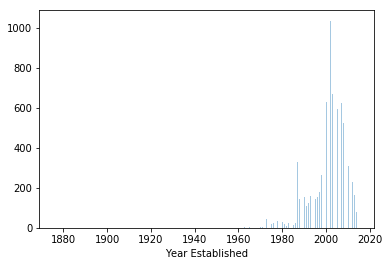

In [42]:
sns.distplot(df['Year Established'], bins=500, kde=False, label='Number of Easements Established Each Year Nationwide')
# df['Year Established'].hist(bins=500, figsize=(20,10))
plt.savefig('year_easement_est.png')

In [40]:
sns.distplot?

In [13]:
#now let's look at ALL the NCED data
#downloaded from here: 
# http://www.conservationeasement.us/data_downloads/NCED_Complete_10_05_2016.zip
import geopandas as gpd
from shapely.geometry import Point

In [14]:
full_df = gpd.read_file('/Users/kaitlincough/Documents/data_studio/big_files_that_make_github_sad/NCED_data/NCED_Complete_10_05_2016 2/NCED_Complete_10_05_2016.shp')

In [15]:
full_df.head()

,comments,conflict,dataagg,dataentry,datapvdr,datasrc,day_est,duration,eholdtyp,esmthldr,...,shape_Area,shape_Leng,sitename,source_uid,stacked,state,term,unique_id,wpda_cd,year_est
0,"Ortho1:12,000",Conflict Not Adjusted,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,20,Permanent,Federal,U.S. Natural Resources Conservation Service,...,1.137176e+06,9229.391417,"Wetlands Reserve Program - WRP_Pulaski, AR (05...",,No,Arkansas,0,966576,0,2003
1,La Petite Gemme Prairie; NRCS Boundary with at...,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,27,Permanent,Federal,U.S. Natural Resources Conservation Service,...,1.524831e+05,2395.155613,"Grasslands Reserve Program - GRP_Polk, MO (29167)",,No,Missouri,0,51224,44442390,2007
2,NAIP,Conflict Not Adjusted,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,21,Permanent,Unknown Easement Holder,Unknown Easement Holder,...,1.052454e+06,4665.511807,Farm and Ranch Lands Protection Program - FRPP...,,No,West Virginia,0,966207,0,2009
3,,Conflict Not Adjusted,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,0,Permanent,Jointly Held,Unknown Easement Holder,...,1.015684e+06,4421.305605,Farm and Ranch Lands Protection Program - FRPP...,,No,Texas,0,986186,0,2012
4,USFS Forest Legacy Program,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,9,Permanent,State,State of Maryland,...,1.068534e+05,1800.827698,"Wetlands Reserve Program - WRP_Worcester, MD (...",85,No,Maryland,0,850018,0,2000


In [16]:
pd.set_option('display.max_columns', 100)

In [17]:
full_df.head(100)

,comments,conflict,dataagg,dataentry,datapvdr,datasrc,day_est,duration,eholdtyp,esmthldr,gapsts,geometry,gis_acres,iucncat,mon_est,owntype,pct_diff,pubaccess,purpose,rep_acres,s_emthd1,s_emthd2,security,shape_Area,shape_Leng,sitename,source_uid,stacked,state,term,unique_id,wpda_cd,year_est
0,"Ortho1:12,000",Conflict Not Adjusted,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,20,Permanent,Federal,U.S. Natural Resources Conservation Service,4 - No known mandate for protection,"(POLYGON ((348037.0300000012 1280080.77, 34804...",281.002366,,6,Private,0.000000,Closed,Environmental System,0.000000,,,No Restrictions,1.137176e+06,9229.391417,"Wetlands Reserve Program - WRP_Pulaski, AR (05...",,No,Arkansas,0,966576,0,2003
1,La Petite Gemme Prairie; NRCS Boundary with at...,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,27,Permanent,Federal,U.S. Natural Resources Conservation Service,1 - Managed for biodiversity - disturbance eve...,"(POLYGON ((226567.0700000003 1617130.34, 22656...",37.679395,V - Protected Landscape / Seascape,11,Non-Governmental Organization,0.000019,Closed,Environmental System,37.678687,,,No Restrictions,1.524831e+05,2395.155613,"Grasslands Reserve Program - GRP_Polk, MO (29167)",,No,Missouri,0,51224,44442390,2007
2,NAIP,Conflict Not Adjusted,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,21,Permanent,Unknown Easement Holder,Unknown Easement Holder,4 - No known mandate for protection,"POLYGON ((1531220.43 1962059.189999999, 153152...",260.067097,,12,Private,0.000007,Closed,Open Space - Farm,260.065391,,,No Restrictions,1.052454e+06,4665.511807,Farm and Ranch Lands Protection Program - FRPP...,,No,West Virginia,0,966207,0,2009
3,,Conflict Not Adjusted,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,0,Permanent,Jointly Held,Unknown Easement Holder,4 - No known mandate for protection,POLYGON ((-141093.0899999999 805145.0300000003...,250.980991,,0,Private,0.000000,Closed,Open Space - Farm,0.000000,Unknown,,No Restrictions,1.015684e+06,4421.305605,Farm and Ranch Lands Protection Program - FRPP...,,No,Texas,0,986186,0,2012
4,USFS Forest Legacy Program,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,9,Permanent,State,State of Maryland,3 - Managed for multiple uses - subject to ext...,"POLYGON ((1781411.170000002 1872734.76, 178138...",26.404046,Unassigned,2,Unknown Landowner,0.000013,Closed,Environmental System,26.404384,,,No Restrictions,1.068534e+05,1800.827698,"Wetlands Reserve Program - WRP_Worcester, MD (...",85,No,Maryland,0,850018,0,2000
5,Penn-Sylvania Prairie; Legal Survey- COGO,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,15,Permanent,Federal,U.S. Natural Resources Conservation Service,4 - No known mandate for protection,"POLYGON ((175924.8999999985 1607861.35, 175956...",157.969722,,8,Non-Governmental Organization,0.000002,Closed,Environmental System,157.969333,,,No Restrictions,6.392808e+05,3931.239634,"Grasslands Reserve Program - GRP_Dade, MO (29057)",,No,Missouri,0,51223,0,2007
6,Legal Survey- COGO,Conflict Not Adjusted,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NRCS_easement_a_extract,NRCS_easement_a_extract.gdb/easement_a_extract,16,Permanent,Federal,U.S. Natural Resources Conservation Service,4 - No known mandate for protection,"(POLYGON ((-73155.48000000045 1965974.84, -731...",309.027914,,5,Private,0.000000,Closed,Environmental System,0.000000,,,No Restrictions,1.250592e+06,8043.878391,"Grasslands Reserve Program - GRP_Lancaster, NE...",,No,Nebraska,0,965344,0,2006
7,Conflict with Missouri Prairie Foundation. Leg...

In [44]:
full_df['owntype'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize=(20,10))

KeyError: 'country'

In [19]:
#why are some of the years 0?
full_df[full_df['year_est'] ==0]

,comments,conflict,dataagg,dataentry,datapvdr,datasrc,day_est,duration,eholdtyp,esmthldr,gapsts,geometry,gis_acres,iucncat,mon_est,owntype,pct_diff,pubaccess,purpose,rep_acres,s_emthd1,s_emthd2,security,shape_Area,shape_Leng,sitename,source_uid,stacked,state,term,unique_id,wpda_cd,year_est
29,,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NPS_Tracts,NPS_Tracts.shp,0,Permanent,Federal,U.S. National Park Service,3 - Managed for multiple uses - subject to ext...,"POLYGON ((1546574.5 1976706.49, 1546564.98 197...",1.277492,Unassigned,0,Federal,0.000000,Restricted Access,Historic Preservation,0.000000,,,No Restrictions,5.169829e+03,384.742293,Antietam,85910,No,Maryland,0,916745,0,0
30,,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NPS_Tracts,NPS_Tracts.shp,0,Permanent,Federal,U.S. National Park Service,3 - Managed for multiple uses - subject to ext...,"(POLYGON ((1577296.77 1971363.439999999, 15773...",14.348915,Unassigned,0,Federal,0.000000,Restricted Access,Historic Preservation,0.000000,,,No Restrictions,5.806800e+04,1690.145898,Monocacy,85923,No,Maryland,0,916757,0,0
31,,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NPS_Tracts,NPS_Tracts.shp,0,Permanent,Federal,U.S. National Park Service,3 - Managed for multiple uses - subject to ext...,"POLYGON ((1620922.32 1419542.949999999, 162092...",3.126122,Unassigned,0,Federal,0.000000,Restricted Access,Historic Preservation,0.000000,,,No Restrictions,1.264894e+04,1800.962409,Moores Creek,75023,No,North Carolina,0,913282,0,0
33,"NPScape GAP Status Code and Category Review, N...",No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NPS_Tracts,NPS_Tracts.shp,0,Permanent,Federal,U.S. National Park Service,2 - Managed for biodiversity - disturbance eve...,"(POLYGON ((1100158.18 1586176.810000001, 11002...",133.653767,III - Natural Monument or Feature,0,Federal,0.000000,Restricted Access,Historic Preservation,0.000000,,,No Restrictions,5.408776e+05,8600.713652,Cumberland Gap,75294,No,Kentucky,0,913589,367598,0
34,"NPScape GAP Status Code and Category Review, N...",No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NPS_Tracts,NPS_Tracts.shp,0,Permanent,Federal,U.S. National Park Service,2 - Managed for biodiversity - disturbance eve...,"(POLYGON ((1090299.07 1576182.199999999, 10902...",1.712623,III - Natural Monument or Feature,0,Federal,0.000000,Restricted Access,Historic Preservation,0.000000,,,No Restrictions,6.931038e+03,2669.693899,Cumberland Gap,75292,No,Tennessee,0,913365,367598,0
35,,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NPS_Tracts,NPS_Tracts.shp,0,Permanent,Federal,U.S. National Park Service,3 - Managed for multiple uses - subject to ext...,"POLYGON ((1551351.620000001 1960808.84, 155118...",2.324811,Unassigned,0,Federal,0.000000,Restricted Access,Historic Preservation,0.000000,,,No Restrictions,9.408192e+03,799.768012,Harpers Ferry,,No,Maryland,0,916752,0,0
36,,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NPS_Tracts,NPS_Tracts.shp,0,Permanent,Federal,U.S. National Park Service,3 - Managed for multiple uses - subject to ext...,"POLYGON ((1550996.190000001 1960812.560000001,...",0.160048,Unassigned,0,Federal,0.000000,Restricted Access,Historic Preservation,0.000000,,,No Restrictions,6.476898e+02,428.275320,Harpers Ferry,85919,No,West Virginia,0,916753,0,0
37,Easements other than scenic/conservation easem...,No Known Conflict,Ducks Unlimited,2015-09-23,GAP_PADUS1_4Easements_NPS_Tracts,NPS_Tracts.shp,0,Permanent,Federal,U.S. National Park Service,2 - Managed for biodiversity - disturbance eve...,"POLYGON ((1725623.390000001 2085676.779999999,...",0.477325,V - Protected Landscape / Seascape,0,Federal,0.000000,Restricted Access,Historic Preservation,0.000000,,,No Restrictions,1.931664e+03,223.733937,Valley Forge,85941,No,Pennsylvania,0,916704,376395,0
38,Easements other than scenic/conservation easem...,No Known Conflict,Ducks Unlimited,2015-09-23

In [20]:
# full_df.groupby('year_est')['gis_acres','state'].sum()

In [21]:
# state_grouped = full_df.groupby('state')['gis_acres'].agg(['count','min','max','sum','mean'])
# state_grouped.head()

In [22]:
# state_grouped.plot(kind='barh', figsize=(20,10))

In [23]:
#let's groupby the state and the year and
#get counts for the acreage-so
#for each state, how many acres were conserved 
#per year?
grouped_state_year = full_df.groupby(['state', 'year_est'])['gis_acres'].agg(['count','min','max','sum','mean'])
grouped_state_year.head(50)

count         min           max           sum         mean
state   year_est                                                            
Alabama 0            51    0.118161  11383.373270  22381.365680   438.850307
        1997          5   78.867069    273.215722    785.138395   157.027679
        1998          6    7.880206    247.058312    602.929725   100.488287
        2000          1  177.486926    177.486926    177.486926   177.486926
        2001          4    5.483378    114.580067    260.159505    65.039876
        2002         10    0.505406   2835.771963   3740.506503   374.050650
        2003         14   16.047945   4158.194922  11333.383954   809.527425
        2004         27   15.209874   2191.113371   9537.931492   353.256722
        2005         20    0.327647   1023.809411   4108.018103   205.400905
        2006         24   17.853803   3262.527771   9046.376665   376.932361
        2007         49   12.224942   4016.173500  29030.421322   592.457578
        2008         35   15.956605   1930.485874   7700.167296   220.004780
        2009         31    7.765111   3804.161283  12677.531533   408.952630
        2010         60   13.104821   1171.034637  13649.350876   227.489181
        2011         47   12.255646   2289.375904  13710.593091   291.714747
        2012         31   11.820362    916.710230   6377.091199   205.712619
        2013         35   13.461384   5659.226354  18275.854669   522.167276
        2014         25    1.794561   1062.539128   5718.188842   228.727554
        2015          1   40.559421     40.559421     40.559421    40.559421
Alaska  0            27    1.000053  19489.912933  53188.398317  1969.940678
        1991          2  119.943345    649.385656    769.329001   384.664501
        1992          1   19.994136     19.994136     19.994136    19.994136
        1994          3    6.297549     46.776068     72.884444    24.294815
        1995          1   44.808807     44.808807     44.808807    44.808807
        1996          6    5.247900    219.993499    493.477877    82.246313
        1997          8    1.671403    145.630561    330.205163    41.275645
        1998          3   13.913019     76.906447    130.178896    43.392965
        1999          7    3.406518    108.688758    416.265604    59.466515
        2000          4   19.784169    142.725646    287.576008    71.894002
        2001          7   11.536209   1430.154372   2687.130543   383.875792
        2002          5    0.949736  34946.296806  35021.191125  7004.238225
        2003          9    0.185220    168.271974    540.257837    60.028649
        2004          4   12.135563     33.144657    101.170433    25.292608
        2005         11    2.385673   2207.494985   2481.668907   225.606264
        2006          3    3.620494    119.247900    162.993769    54.331256
        2007          8    2.573176    149.995413    506.074698    63.259337
        2008          4    9.903018  33630.746274  33731.742506  8432.935627
        2009         10    2.649866   1990.335718   4977.819094   497.781909
        2010         14    0.669451    149.445923    516.051111    36.860794
        2011          4   20.419980    113.301420    207.749819    51.937455
        2012          2   40.066782    174.562973    214.629755   107.314878
        2013          1   40.004595     40.004595     40.004595    40.004595
        2014          2    6.184044     29.291570     35.475614    17.737807
        2015          4   32.829736    129.049896    274.735579    68.683895
Arizona 0            15    0.224017  20501.369055  62147.591748  4143.172783
        1936          1   43.641442     43.641442     43.641442    43.641442
        1989          1    1.281341      1.281341      1.281341     1.281341
        1996          1   38.331682     38.331682     38.331682    38.331682
        1997          1   19.324663     19.324663     19.324663    19.324663
        1998          1    7.210858      7.210858      7.210858     7.210858

In [24]:
#there are two indices?? at the moment
#let's make it just the state
#and make year a column
grouped_state_year.reset_index('year_est', inplace=True)
grouped_state_year.head()

,year_est,count,min,max,sum,mean
state,,,,,,
Alabama,0,51,0.118161,11383.373270,22381.365680,438.850307
Alabama,1997,5,78.867069,273.215722,785.138395,157.027679
Alabama,1998,6,7.880206,247.058312,602.929725,100.488287
Alabama,2000,1,177.486926,177.486926,177.486926,177.486926
Alabama,2001,4,5.483378,114.580067,260.159505,65.039876


In [25]:
#okay so there are wierd 0 values. 
#i think they're important and shouldn't be deleted
#but I want to see if this will even work
#so i'm going to get rid of all years = 0 for now
grouped_state_year = grouped_state_year[grouped_state_year['year_est'] !=0]
grouped_state_year.head()

,year_est,count,min,max,sum,mean
state,,,,,,
Alabama,1997,5,78.867069,273.215722,785.138395,157.027679
Alabama,1998,6,7.880206,247.058312,602.929725,100.488287
Alabama,2000,1,177.486926,177.486926,177.486926,177.486926
Alabama,2001,4,5.483378,114.580067,260.159505,65.039876
Alabama,2002,10,0.505406,2835.771963,3740.506503,374.050650


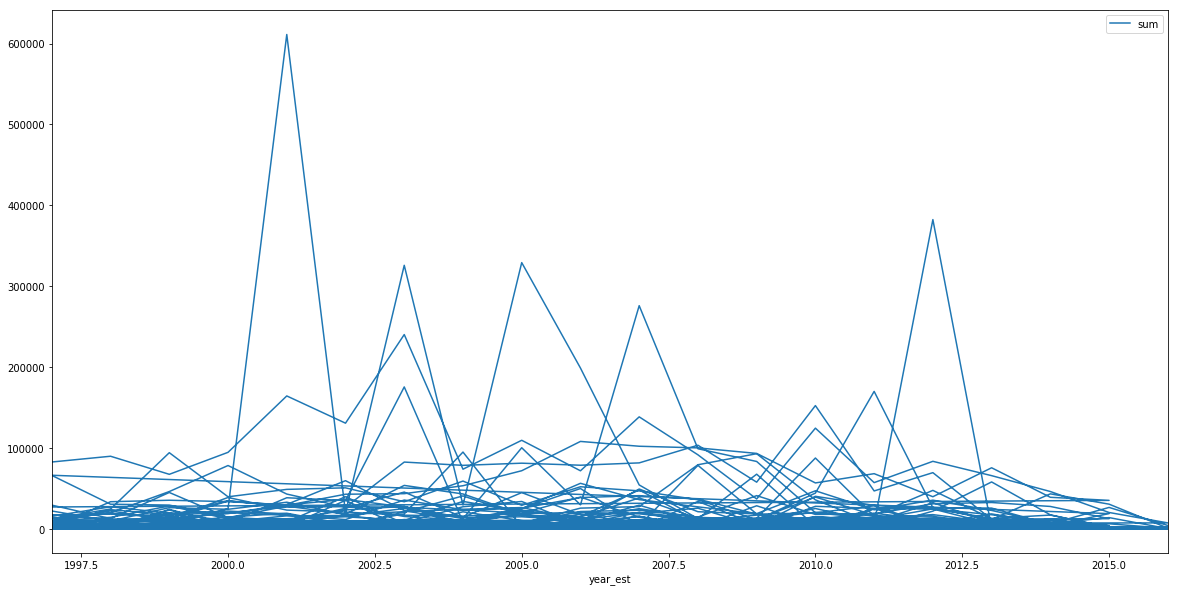

In [26]:
grouped_state_year.plot(x='year_est', y='sum', figsize=(20,10))

In [27]:
grouped_state_year.reset_index(inplace=True)
grouped_state_year.head()

,state,year_est,count,min,max,sum,mean
0,Alabama,1997,5,78.867069,273.215722,785.138395,157.027679
1,Alabama,1998,6,7.880206,247.058312,602.929725,100.488287
2,Alabama,2000,1,177.486926,177.486926,177.486926,177.486926
3,Alabama,2001,4,5.483378,114.580067,260.159505,65.039876
4,Alabama,2002,10,0.505406,2835.771963,3740.506503,374.050650


In [28]:
#that's horrible and you can't tell what
#anything is so let's try it with seaborn
import seaborn as sns
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

In [29]:
>>> import pandas as pd
>>> df = pd.DataFrame(
...     data=np.random.randn(90, 4),
...     columns=pd.Series(list("ABCD"), name="walk"),
...     index=pd.date_range("2015-01-01", "2015-03-31",
...                         name="date"))
>>> df = df.cumsum(axis=0).stack().reset_index(name="val")
>>> def dateplot(x, y, **kwargs):
...     ax = plt.gca()
...     data = kwargs.pop("data")
...     data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
>>> g = sns.FacetGrid(df, col="walk", col_wrap=2, size=3.5)
>>> g = g.map_dataframe(dateplot, "date", "val")

NameError: name 'np' is not defined

In [ ]:
import pandas as pd
import numpy as np
grouped_state_year = pd.DataFrame(
     data=np.random.randn(42735, 4),
     columns=pd.Series(list("ABCD"), name="state"),
     index=pd.date_range("1900-01-1", "2017-01-01",
                         name="date"))
grouped_state_year = grouped_state_year.cumsum(axis=0).stack().reset_index(name="sum")
def dateplot(x, y, **kwargs):
     ax = plt.gca()
     data = kwargs.pop("data")
     data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
g = sns.FacetGrid(grouped_state_year, col="state", col_wrap=2, size=3.5)
g = g.map_dataframe(dateplot, "date", "sum")

In [ ]:
sns.FacetGrid(x="year_est",
           y="sum",
           col="state",
           data=grouped_state_year,
           col_wrap=3,
           hue='state',
           fit_reg=False);